## Imports

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import datasets, cluster
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, hamming_loss, zero_one_loss, jaccard_score, f1_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB

import warnings
warnings.filterwarnings('ignore')

## Create dataset

In [2]:
X, y = datasets.make_moons(n_samples = 1000, shuffle = True, noise = True, random_state = 25)
X, y = pd.DataFrame(X), pd.DataFrame(y, columns = ['target'])

dataset = X.join(y, how = 'inner')
dataset.columns = ['feature_1', 'feature_2', 'target']

## Take a look at the dataset

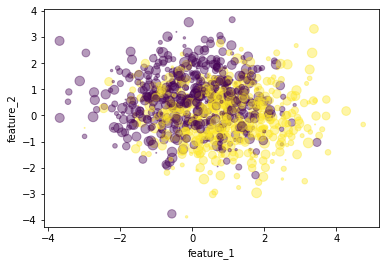

In [3]:
plt.scatter(dataset.feature_1, dataset.feature_2, c = dataset.target, alpha = 0.4, s = np.arange(1, 100, 5))
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show()

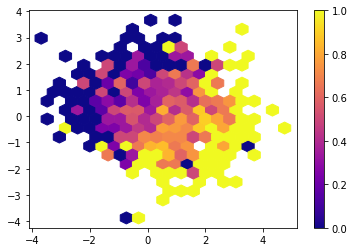

In [4]:
fig, ax = plt.subplots(1, 1)
hb = ax.hexbin(dataset.feature_1, dataset.feature_2, C = dataset.target, gridsize = 20, cmap = 'plasma', reduce_C_function = np.mean)
cb = fig.colorbar(hb)
plt.show()

### Check if the class count is balanced

In [5]:
dataset.target.value_counts()

1    500
0    500
Name: target, dtype: int64

## Add polynomial features

In [6]:
poly = PolynomialFeatures(degree = 2, include_bias = False)

In [7]:
new_X = X.copy()
new_X = pd.DataFrame(poly.fit_transform(new_X))
new_X = new_X.join(y)
new_X.columns = ['feature_1', 'feature_2', 'feature_1_squared', 'feature_1*feature_2', 'feature_2_squared', 'target']

## Example of a scatter plot of the initial two features

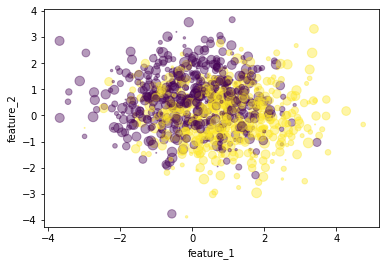

In [8]:
plt.scatter(new_X.iloc[:, 0], new_X.iloc[:, 1], c = new_X.target, alpha = 0.4, s = np.arange(1, 100, 5))
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show()

## Pairplots

From the pairplots we see that some of the added polynomial features have an interesting relationship with the original ones in terms class split. <br>

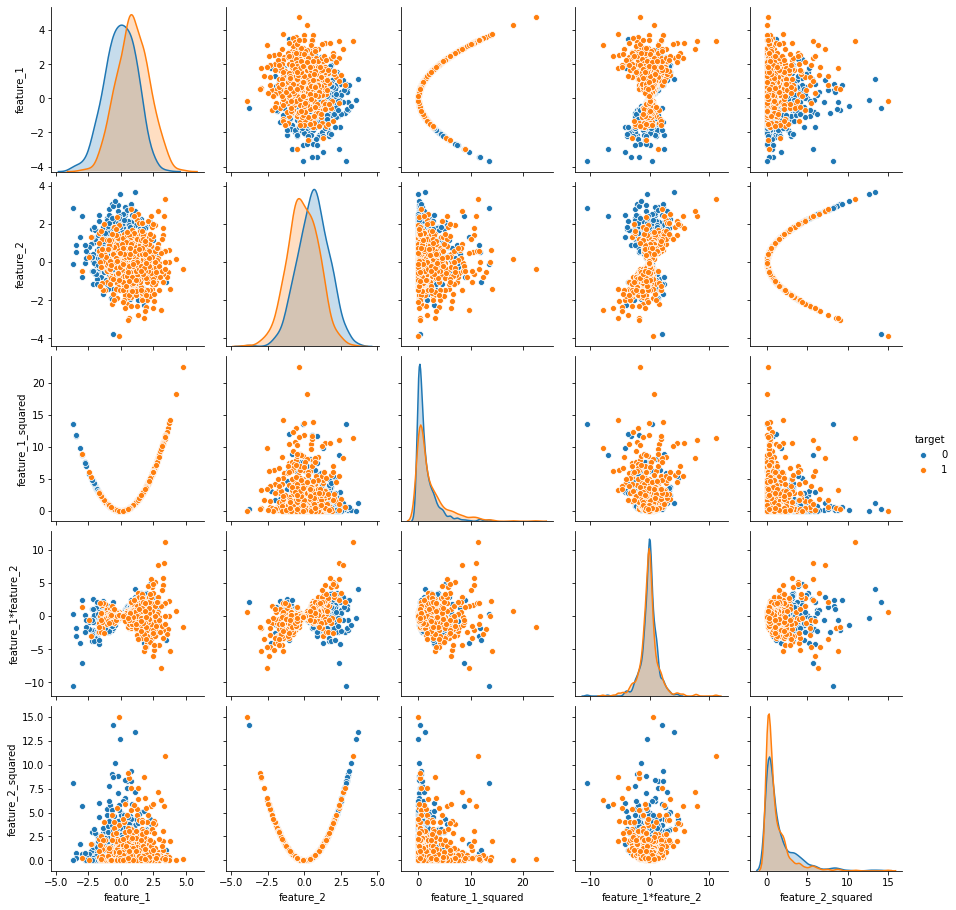

In [9]:
sns.pairplot(new_X, hue = 'target')

## Examples of interesting pairplots.

For instance, feature_1  and feature_1_squared have such a joint distribution that almost all class 1 observations lie in the region where feature_1 is positive.

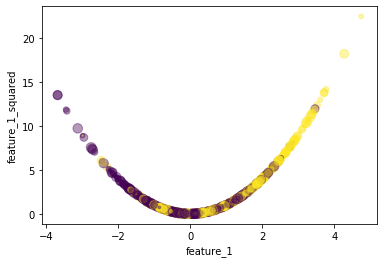

In [10]:
plt.scatter(new_X.iloc[:, 0], new_X.iloc[:, 2], c = new_X.target, alpha = 0.4, s = np.arange(1, 100, 5))
plt.xlabel('feature_1')
plt.ylabel('feature_1_squared')
plt.show()

## Feature_2 and feature_2_squared

For instance, feature_1  and feature_1_squared have such a joint distribution that almost all class 1 observations lie in the region where feature_1 is positive.

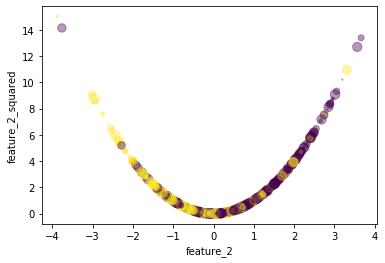

In [11]:
plt.scatter(new_X.iloc[:, 1], new_X.iloc[:, 4], c = new_X.target, alpha = 0.4, s = np.arange(1, 100, 5))
plt.xlabel('feature_2')
plt.ylabel('feature_2_squared')
plt.show()

## Dataset overview

We see that data has no duplicates and no missing values as NaNs.

In [12]:
dataset.isnull().sum()

feature_1    0
feature_2    0
target       0
dtype: int64

In [13]:
dataset.duplicated().sum()

0

## Apply scalers

In [14]:
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [15]:
a = new_X.drop(columns = ['target']).copy()

In [16]:
b = pd.DataFrame(std_scaler.fit_transform(a))
c = pd.DataFrame(min_max_scaler.fit_transform(a))

In [17]:
b.head()

,0,1,2,3,4
0,0.279069,-0.500824,-0.465326,-0.122294,-0.668371
1,-0.372448,1.181939,-0.727542,0.007781,0.665413
2,0.398401,0.451653,-0.357999,0.534212,-0.376075
3,1.045028,-0.233869,0.542862,0.054834,-0.708169
4,-0.046588,-1.260206,-0.664802,-0.271404,-0.036772


In [18]:
c.head()

,0,1,2,3,4
0,0.535403,0.477862,0.030585,0.473736,0.005030
1,0.434830,0.727861,0.000013,0.482951,0.172334
2,0.553825,0.619366,0.043099,0.520242,0.041694
3,0.653643,0.517522,0.148132,0.486284,0.000037
4,0.485132,0.365045,0.007328,0.463174,0.084255


## Split data into training, validation and testing

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 25)

## Model building

In [20]:
svc = svm.SVC()
svc.fit(X_train, y_train)

predictions = svc.predict(X_valid)

probs = svc.predict_proba(X_valid)

## Metrics for classification

Different classification metrics are presented below

In [24]:
acc_score = accuracy_score(y_valid, predictions)
print(acc_score)

0.6702127659574468


In [25]:
prec_score = precision_score(y_valid, predictions)
print(prec_score)

0.6363636363636364


In [26]:
rec_score = recall_score(y_valid, predictions)
print(rec_score)

0.7078651685393258


In [29]:
f1 = f1_score(y_valid, predictions)
print(f1)

0.6702127659574467


In [30]:
roc_auc = roc_auc_score(y_valid, predictions)
print(roc_auc)

0.6721144024514811


In [31]:
hamm_loss = hamming_loss(y_valid, predictions)
print(hamm_loss)

0.32978723404255317


In [32]:
zero_one = zero_one_loss(y_valid, predictions, normalize = True)
print(zero_one)

0.32978723404255317


In [33]:
jacc_score = jaccard_score(y_valid, predictions, average = 'weighted')
print(jacc_score)

0.504


## Plot ROC-AUC-curve

In [34]:
fpr, tpr, thresholds = roc_curve(y_valid, probs[:, 1])

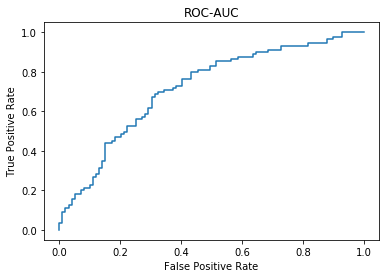

In [35]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.show()

## Classification report

In [36]:
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67        99
           1       0.64      0.71      0.67        89

    accuracy                           0.67       188
   macro avg       0.67      0.67      0.67       188
weighted avg       0.67      0.67      0.67       188



## Multiclass classification example

In [37]:
y.squeeze().value_counts()

1    500
0    500
Name: target, dtype: int64

## One-vs-Rest classification

In [38]:
X, y = make_classification(n_samples = 1000, n_features = 10, n_informative = 4, n_classes = 4, random_state = 25)
X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 25)

In [39]:
logreg = LogisticRegression(random_state = 25, multi_class = 'ovr')

In [40]:
logreg.fit(X_train, y_train)
pred = logreg.predict(X_valid)

In [41]:
ovr = OneVsRestClassifier(logreg)

In [42]:
ovr.fit(X_train, y_train)
ovr_predictions = ovr.predict(X_valid)

## One-vs-One classification

In [43]:
ovo = OneVsOneClassifier(logreg)

In [44]:
ovo.fit(X_train, y_train)
ovo_predictions = ovo.predict(X_valid)

## Different classification algorithms

### Decision tree

In [45]:
dec_tree = tree.DecisionTreeClassifier(random_state = 25, criterion = 'entropy')

dec_tree.fit(X_train, y_train)
pred_tree = dec_tree.predict(X_valid)

#tree.plot_tree(dec_tree)

### SGD Classifier

In [48]:
sgd = SGDClassifier(random_state = 25)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_valid)

In [48]:
#proba_sgd = sgd.predict_proba(X_valid)

## Naive Bayes

### Gaussian NB

gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)
pred_gauss_nb = gauss_nb.predict(X_valid)
proba_gauss_nb = gauss_nb.predict_proba(X_valid)

### Multinomial NB

multi_nb = MultinomialNB()
multi_X = X_train.apply(lambda x: abs(x), axis = 0)
multi_nb.fit(multi_X, y_train)
pred_multi_nb = multi_nb.predict(X_valid)
proba_multi_nb = multi_nb.predict_proba(X_valid)

## Compare models on the initial binary dataset

Below we will use the f1_score metrics to assess and compare the performance of our models. For simplicity, we will use the initial two-class dataset that we generated using make_classification from sklearn.

In [80]:
X, y = datasets.make_moons(n_samples = 1000, shuffle = True, noise = True, random_state = 25)
X, y = pd.DataFrame(X), pd.DataFrame(y, columns = ['target'])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 25)

## Polynomial features / MinMax 

In [82]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
min_max_scaler = MinMaxScaler()

## SVC

In [83]:
svc = svm.SVC()

In [84]:
pipe = Pipeline([('poly', poly), ('minmax', min_max_scaler), ('svc', svc)])
param_grid_svc = {'svc__C' : np.arange(0, 2.1, 0.1)}
grid_search_svc = GridSearchCV(pipe, param_grid_svc)
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('minmax',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degre

In [85]:
pred_svc = grid_search_svc.predict(X_valid)
f1_score(y_valid, pred_svc)

0.6735751295336788

## Logistic Regression

In [86]:
logreg = LogisticRegression()

In [87]:
pipe = Pipeline([('poly', poly), ('minmax', min_max_scaler), ('logreg', logreg)])
param_grid_logreg = {'logreg__C' : np.arange(0, 2.1, 0.1), 'logreg__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_search_logreg = GridSearchCV(pipe, param_grid_logreg)
grid_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('minmax',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                              

In [88]:
pred_logreg = grid_search_logreg.predict(X_valid)
f1_score(y_valid, pred_logreg)

0.6701570680628272

## Stochastic gradient classifier (SGD)

In [89]:
sgd = SGDClassifier(random_state = 25)

In [90]:
pipe = Pipeline([('poly', poly), ('minmax', min_max_scaler), ('sgd', sgd)])
param_grid_sgd = {'sgd__alpha' : np.arange(0.0001, 0.1, 0.1), 'sgd__l1_ratio' : np.arange(0, 1.1, 0.1)}
grid_search_sgd = GridSearchCV(pipe, param_grid_sgd)
grid_search_sgd.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('minmax',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('sgd',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=False,
                                         

In [92]:
pred_sgd = grid_search_sgd.predict(X_valid)
f1_score(y_valid, pred_sgd)

0.5035971223021583

## Testing the best model

In [94]:
pred_svc_final = grid_search_svc.predict(X_test)
f1_score(y_test, pred_svc_final)

0.6720647773279351